# Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

***For many incumbent operators, retaining high profitable customers is the number one business goal.***

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and defining churn

There are two main models of payment in the telecom industry - ***postpaid*** (customers pay a monthly/annual bill after using the services) and ***prepaid*** (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

### Definitions of churn

***Revenue-based churn:*** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

***Usage-based churn:*** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the ***usage-based definition to define churn.***

### High-value churn

In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Loading Data

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Load the data
churn = pd.read_csv('telecom_churn_data.csv')

In [4]:
# display the dataset
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
# Shape of the dataset
churn.shape

(99999, 226)

**There is around 1 lac datapoints and 226 columns**

In [6]:
# lets check the numeriacal attributes of the dataset by using describe function
churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

**There is 214 attributes which are having numerical datapoints**

In [7]:
# make a copy of original dataset for further analysis
telecom = churn.copy()

## Step 1. Data Prepration

**High Value Customers**

In [8]:
all_col = telecom.columns.tolist()

In [9]:
rech_col = [col for col in all_col if 'rech' in col]

In [10]:
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [11]:
# Find Average recharge amount for good phase i.e 6th and 7th month
good_phase_avg_rech_amt = ( telecom['total_rech_amt_6'].fillna(0) + telecom['total_rech_amt_7'].fillna(0)) / 2

# 70 percentile of the good_phase_avg_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_avg_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# Keep high value customer data
telecom = telecom[good_phase_avg_rech_amt >= gd_phase_avg_rech_amt_70]
telecom.shape

70 Percentile of recharge amount is : 368.5


(30011, 226)

In [12]:
# drop the used columns
telecom.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis = 1, inplace = True)

In [13]:
# after dropping lets check the shape of the dataset
telecom.shape

(30011, 218)

### 2. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [14]:
# columns of 9 month
mnth9_col = [col for col in all_col if '9' in col]

# columns with ic
mnth9_ic_col = [col for col in mnth9_col if 'ic' in col and 'mou' in col]

# columns with oc
mnth9_oc_col = [col for col in mnth9_col if 'oc' in col and 'mou' in col]

# columns with vol
mnth9_vol_col = [col for col in mnth9_col if 'vol' in col and 'mb' in col]



In [15]:
# sum of all the ic col
telecom['ic_sum'] = churn[mnth9_ic_col].sum(axis = 1)

# sum of all oc col
telecom['oc_sum'] = churn[mnth9_oc_col].sum(axis = 1)

# sum of all the vol col
telecom['vol_sum'] = churn[mnth9_vol_col].sum(axis = 1)

churn_tag_col = ['ic_sum', 'oc_sum', 'vol_sum']

# creating a new columns name as churn as the sum of new columns
telecom['churn'] = telecom[churn_tag_col].sum(axis = 1)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

**As we can see the churn column if the churn value is greater than 0 then it is active user lets display it**

In [16]:
# active users
telecom['churn'] = telecom['churn'].apply(lambda x: 0 if x>0 else 1)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

In [17]:
# check the distribution of the churn column
telecom.churn.value_counts(normalize = True)

churn
0    0.942988
1    0.057012
Name: proportion, dtype: float64

In [18]:
# drop the used columns
telecom.drop([col for col in mnth9_col + churn_tag_col if col not in ['total_rech_data_9', 'av_rech_amt_data_9']], axis = 1, inplace = True)

In [19]:
# now check the shape
telecom.shape

(30011, 167)

## Step 2. Exporatory Data Analysis (EDA)

### Data Cleaning

#### Missing Values

In [20]:
# Checking for missing values
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                114
std_og_t2o_mou                114
loc_ic_t2o_mou                114
last_date_of_month_6            0
last_date_of_month_7           31
last_date_of_month_8          157
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   316
onnet_mou_7                   303
onnet_mou_8                   938
offnet_mou_6                  316
offnet_mou_7                  303
offnet_mou_8                  938
roam_ic_mou_6                 316
roam_ic_mou_7                 303
roam_ic_mou_8                 938
roam_og_mou_6                 316
roam_og_mou_7                 303
roam_og_mou_8                 938
loc_og_t2t_mou_6              316
loc_og_t2t_mou_7              303
loc_og_t2t_mou_8              938
loc_og_t2m_mou_6              316
loc_og_t2m_mou_7              303
loc_og_t2m_mou_8              938
loc_og_t2f_mou

In [21]:
missing_percentage = telecom.isnull().mean()*100

In [22]:
missing_percentage.tolist()

[0.0,
 0.0,
 0.37986071773682983,
 0.37986071773682983,
 0.37986071773682983,
 0.0,
 0.10329545833194496,
 0.5231415147779148,
 0.0,
 0.0,
 0.0,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.0096298024057846,
 3.1255206424311086,
 1.0529472526740196,
 1.009629802405

**There is missing values preseny in the dataset and some are at higher side like above 50-60%**
**For higher side of the missing values I decided to derop it**
**First take out the list of above 40% missing values columns***

In [23]:
# take out the list of columns which are having missing values over 40%
drop_miss_col = missing_percentage[missing_percentage > 40].index.tolist()
drop_miss_col

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

**As we see the around 24 columns are listed which are having above 40% missing values**

In [24]:
# droping the missing value columns above 40%
telecom.drop(drop_miss_col,axis = 1, inplace = True)

In [25]:
# lets check the shape of the dataset after dropping the missing value columns
telecom.shape

(30011, 143)

In [26]:
# re-Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)

loc_ic_mou_8            3.13
og_others_8             3.13
loc_og_t2f_mou_8        3.13
loc_ic_t2t_mou_8        3.13
spl_og_mou_8            3.13
loc_og_t2m_mou_8        3.13
loc_ic_t2m_mou_8        3.13
loc_ic_t2f_mou_8        3.13
loc_og_t2t_mou_8        3.13
std_og_t2f_mou_8        3.13
roam_og_mou_8           3.13
loc_og_mou_8            3.13
std_ic_t2t_mou_8        3.13
roam_ic_mou_8           3.13
isd_og_mou_8            3.13
std_ic_t2m_mou_8        3.13
offnet_mou_8            3.13
std_ic_t2f_mou_8        3.13
onnet_mou_8             3.13
std_og_t2t_mou_8        3.13
std_ic_t2o_mou_8        3.13
std_og_mou_8            3.13
std_ic_mou_8            3.13
spl_ic_mou_8            3.13
std_og_t2m_mou_8        3.13
isd_ic_mou_8            3.13
std_og_t2c_mou_8        3.13
ic_others_8             3.13
loc_og_t2c_mou_8        3.13
date_of_last_rech_8     1.98
isd_og_mou_6            1.05
spl_og_mou_6            1.05
std_og_mou_6            1.05
loc_ic_t2f_mou_6        1.05
loc_ic_t2t_mou

**It looks like there is missing values which are less than 4%**
**I have decide that drop that missing rows**

In [27]:
# drop rows with missing values
for col in telecom.columns:
    telecom = telecom[~telecom[col].isna()]

In [28]:
# Re-check the missing values present or not
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False).tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

**Yes all the missing values are removed now data is not having any missing values**

In [29]:
telecom.shape

(28487, 143)

**After removal of missing values rows there is decrease in number of rows in the dataset**

### Check for unwanted Columns

In [30]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
13            6/30/2014            7/31/2014            8/31/2014   492.846   
16            6/30/2014            7/31/2014            8/31/2014   430.975   
17            6/30/2014            7/31/2014            8/31/2014   690.008   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
13   205.671   593.260       501.76       108.39       534.24        413.31   
16   299.869   187.894        50.51        74.01        70.61        296.29   
17    18.980    25.499      1185.91         9.28         7.79         61.64   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64    

**As we above see that there is some columns like mobile number and some date columns I have decided to remove those columns.**
**these columns are not much contribute to the addition of much more information**

In [31]:
# Dropping the column 'mobile_number'
telecom.drop('mobile_number', axis = 1, inplace = True)

In [32]:
# also we are going to drop the date related columns
date_col = [col for col in telecom.columns if 'date' in col]


In [33]:
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [34]:
telecom.drop(date_col, axis = 1, inplace = True)

In [35]:
# check the dataset once
telecom.shape

(28487, 136)

In [36]:
telecom.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7         109             0.0             0.0             0.0  1069.180   
8         109             0.0             0.0             0.0   378.721   
13        109             0.0             0.0             0.0   492.846   
16        109             0.0             0.0             0.0   430.975   
17        109             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
13   205.671   593.260       501.76       108.39       534.24        413.31   
16   299.869   187.894        50.51        74.01        70.61        296.29   
17    18.980    25.499      1185.91         9.28         7.79         61.64   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.

#### Checking for Balancing of the columns

In [37]:
telecom.columns.tolist()

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7'

In [38]:
# Checking the columns that are having unique values
col_unique_val = []

for col in telecom.columns:
    if telecom[f'{col}'].nunique() == 1:
        col_unique_val.append(col)
        
col_unique_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

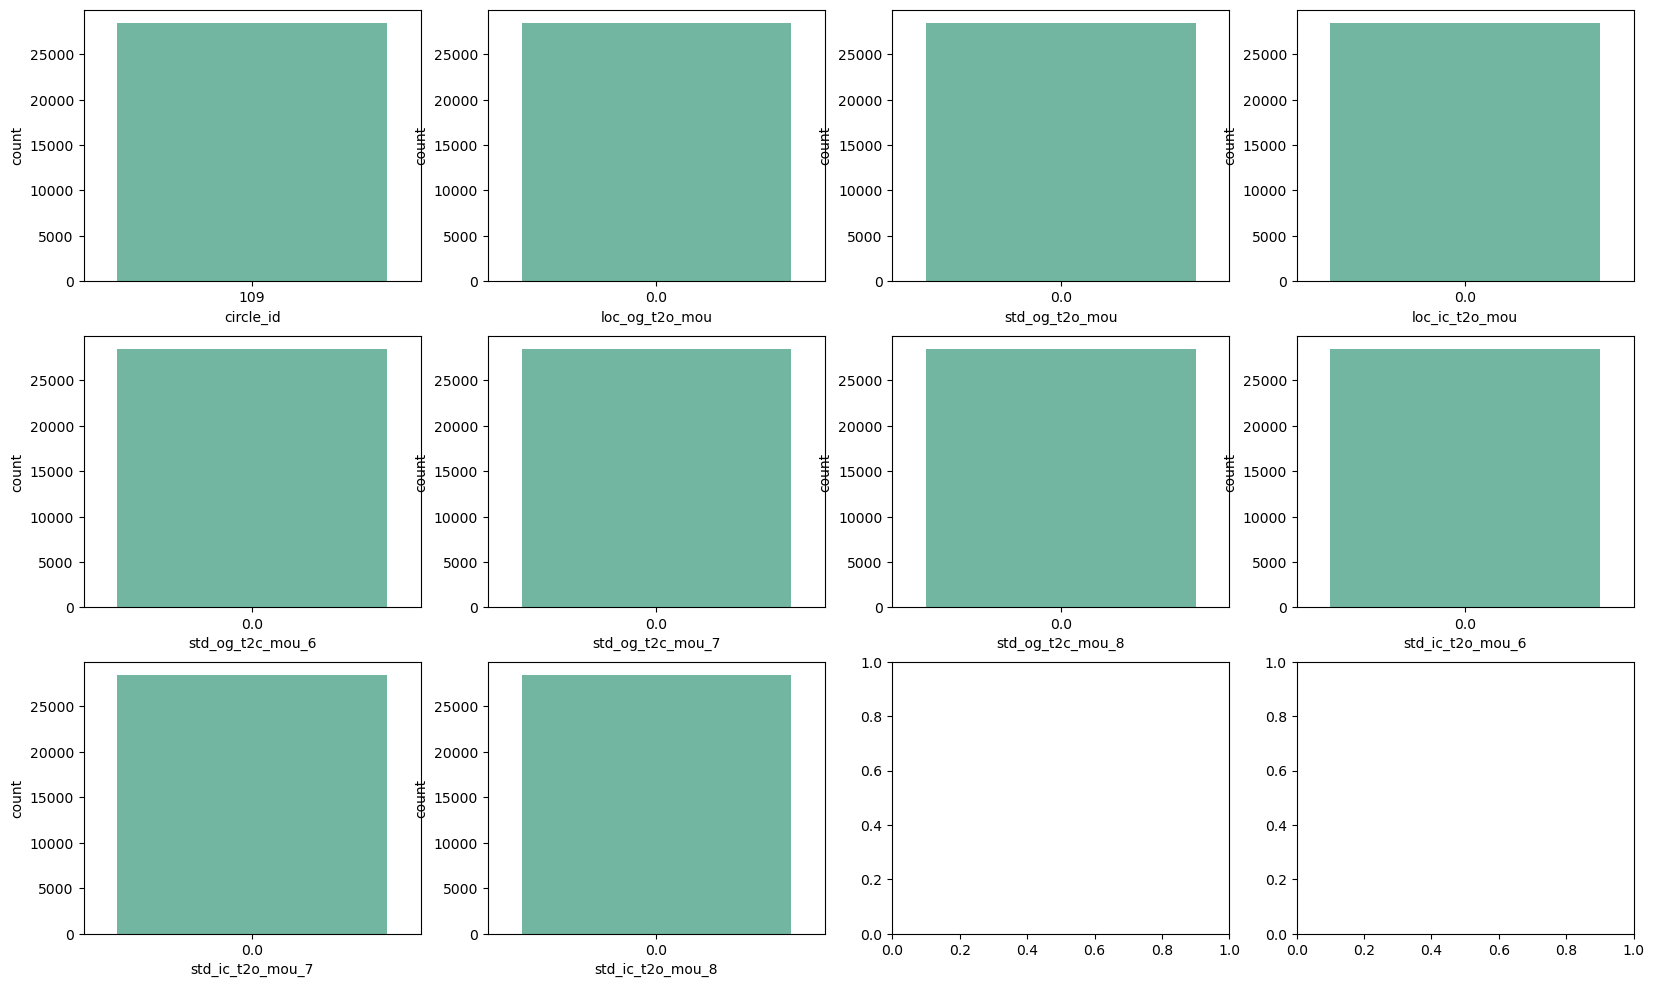

In [39]:
# now we will check the imbalace in variables by bar plot
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

sns.countplot(x='circle_id', data=telecom, ax=axs[0, 0], palette='Set2')
sns.countplot(x='loc_og_t2o_mou', data=telecom, ax=axs[0, 1], palette='Set2')
sns.countplot(x='std_og_t2o_mou', data=telecom, ax=axs[0, 2], palette='Set2')
sns.countplot(x='loc_ic_t2o_mou', data=telecom, ax=axs[0, 3], palette='Set2')
sns.countplot(x='std_og_t2c_mou_6', data=telecom, ax=axs[1, 0], palette='Set2')
sns.countplot(x='std_og_t2c_mou_7', data=telecom, ax=axs[1, 1], palette='Set2')
sns.countplot(x='std_og_t2c_mou_8', data=telecom, ax=axs[1, 2], palette='Set2')
sns.countplot(x='std_ic_t2o_mou_6', data=telecom, ax=axs[1, 3], palette='Set2')
sns.countplot(x='std_ic_t2o_mou_7', data=telecom, ax=axs[2, 0], palette='Set2')
sns.countplot(x='std_ic_t2o_mou_8', data=telecom, ax=axs[2, 1], palette='Set2')

plt.show()

- **as we see the graph all these listed columns are having only one unique value and count is same i.e. 28311**

- **above columns are highly imbalance we need to drop it**

In [40]:
# dropping the unique value columns
telecom.drop(col_unique_val, axis = 1, inplace = True)

In [41]:
telecom.shape

(28487, 126)

### Check the correlation in the columns

In [42]:
telecom.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000  0.697883  0.638198     0.295680     0.161081   
arpu_7              0.697883  1.000000  0.760732     0.151611     0.265026   
arpu_8              0.638198  0.760732  1.000000     0.103197     0.181390   
onnet_mou_6         0.295680  0.151611  0.103197     1.000000     0.743161   
onnet_mou_7         0.161081  0.265026  0.181390     0.743161     1.000000   
onnet_mou_8         0.136781  0.214311  0.302937     0.615849     0.799298   
offnet_mou_6        0.475658  0.299043  0.232611    -0.000677    -0.036589   
offnet_mou_7        0.290460  0.440565  0.322317    -0.053452    -0.008198   
offnet_mou_8        0.247329  0.343136  0.483147    -0.044589    -0.009156   
roam_ic_mou_6       0.104042  0.078944  0.077466     0.003193     0.021590   
roam_ic_mou_7       0.076210  0.081513  0.067553     0.011718    -0.007290   
roam_ic_mou_8       0.085856  0.082445  0.098008     0.032199     0.021833   
roam_og_mou_6       0.174133  0.118934  0.118689     0.050503     0.062070   
roam_og_mou_7       0.132908  0.162687  0.127044     0.056548     0.046442   
roam_og_mou_8       0.117863  0.138173  0.185785     0.058529     0.065668   
loc_og_t2t_mou_6    0.131916  0.065474  0.066408     0.447907     0.328411   
loc_og_t2t_mou_7    0.094901  0.117618  0.096182     0.343817     0.452023   
loc_og_t2t_mou_8    0.094712  0.097486  0.143447     0.303288     0.366518   
loc_og_t2m_mou_6    0.288236  0.157323  0.163229    -0.042593    -0.083565   
loc_og_t2m_mou_7    0.196490  0.240722  0.208791    -0.078665    -0.069864   
loc_og_t2m_mou_8    0.179768  0.194417  0.301393    -0.078444    -0.075160   
loc_og_t2f_mou_6    0.119180  0.087357  0.096612    -0.061594    -0.070359   
loc_og_t2f_mou_7    0.093391  0.110406  0.107270    -0.070905    -0.068223   
loc_og_t2f_mou_8    0.083207  0.092114  0.128919    -0.071105    -0.069757   
loc_og_t2c_mou_6    0.041533  0.006760  0.000716     0.040732     0.028581   
loc_og_t2c_mou_7    0.010049  0.038022  0.017925     0.024744     0.054114   
loc_og_t2c_mou_8    0.006005  0.029097  0.047806     0.036842     0.057964   
loc_og_mou_6        0.278614  0.149307  0.154313     0.250440     0.147902   
loc_og_mou_7        0.194263  0.238655  0.203803     0.174785     0.252711   
loc_og_mou_8        0.180770  0.192407  0.292516     0.143082     0.186332   
std_og_t2t_mou_6    0.237979  0.120357  0.065633     0.846161     0.627351   
std_og_t2t_mou_7    0.114822  0.216238  0.137355     0.621455     0.847981   
std_og_t2t_mou_8    0.090824  0.174444  0.243939     0.511036     0.681089   
std_og_t2m_mou_6    0.268578  0.163642  0.085273     0.030815     0.013055   
std_og_t2m_mou_7    0.138563  0.268236  0.164662    -0.010533     0.034011   
std_og_t2m_mou_8    0.106009  0.200368  0.288720    -0.003875     0.033171   
std_og_t2f_mou_6    0.054850  0.040915  0.044283    -0.039369    -0.042971   
std_og_t2f_mou_7    0.042912  0.057840  0.056679    -0.040493    -0.036319   
std_og_t2f_mou_8    0.030695  0.036472  0.055305    -0.042646    -0.041632   
std_og_mou_6        0.345427  0.193904  0.103491     0.594139     0.433550   
std_og_mou_7        0.173481  0.331254  0.206884     0.408310     0.590936   
std_og_mou_8        0.133156  0.253126  0.359825     0.338645     0.477577   
isd_og_mou_6        0.474245  0.454242  0.428299    -0.017910    -0.016757   
isd_og_mou_7        0.457630  0.531664  0.457338    -0.019686    -0.017943   
isd_og_mou_8        0.451642  0.476052  0.470453    -0.017905    -0.016432   
spl_og_mou_6        0.113649  0.060304  0.093992     0.081080     0.052714   
spl_og_mou_7        0.055546  0.097922  0.108294     0.060067     0.104842   
spl_og_mou_8        0.029290  0.049152  0.080055     0.065047     0.096363   
og_others_6         0.085629  0.023423  0.016535     0.086675     0.040294   
og_others_7         0.024782  0.026245  0.014218    -0.001254    -0.001619   
og_others_8         0.015698  0.017574  0.01

**There are some highly correlated columns in positively and negatively also**


In [43]:
# lets check by statistically
corr = telecom.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.697883
arpu_8              arpu_6              0.638198
                    arpu_7              0.760732
onnet_mou_7         onnet_mou_6         0.743161
onnet_mou_8         onnet_mou_6         0.615849
                    onnet_mou_7         0.799298
offnet_mou_7        offnet_mou_6        0.720012
offnet_mou_8        offnet_mou_7        0.750266
roam_ic_mou_8       roam_ic_mou_7       0.615482
roam_og_mou_6       roam_ic_mou_6       0.642791
roam_og_mou_7       roam_ic_mou_7       0.605475
roam_og_mou_8       roam_og_mou_7       0.601530
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.794737
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.707441
                    loc_og_t2t_mou_7    0.831583
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.778059
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.683782
                    loc_og_t2m_mou_7    0.816132
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.809753
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674121
                    

In [44]:
# List of columns that are highly correlated with other columns
h_corr_col = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

In [45]:
# drop that highly correlated columns
telecom.drop(h_corr_col, axis = 1, inplace = True)

In [46]:
# check the shape again
telecom.shape

(28487, 87)

In [47]:
telecom.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7         533.91        255.79              6.66             20.08   
8         288.18         63.04              0.00              0.00   
13         53.48        353.99              0.00              0.00   
16        215.64        205.93              0.00              0.00   
17          0.00          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
7              16.68         60.86         75.14         77.84           0.0   
8               0.00        130.26        143.48         98.28           0.0   
13              0.00        701.78        138.93        655.18           0.0   
16              0.00         30.89         67.09         21.53           0.0   
17              0.00       1148.46          0.81          0.00           0.0   

    isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7           0.18         10.01          4.50          0.00          6.50   
8           0.00          0.00          0.00          0.00         10.23   
13          0.00          1.29          0.00          0.00          4.78   
16          0.00          0.00          0.00          3.26          5.91   
17          0.00          0.00          2.58          0.00          0.00   

    og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  \
7          0.00          0.0          0.0        427.88        355.23   
8          0.00          0.0          0.0         81.43         23.83   
13         0.00          0.0          0.0        215.58         26.11   
16         0.00          0.0          0.0        276.86        229.83   
17         0.93          0.0          0.0         81.96          2.31   

    loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
7         188.04             36.89             11.83             30.39   
8          15.79              0.00              0.58              0.10   
13        255.26            115.68             38.29            154.58   
16        211.78             68.79             78.64              6.33   
17          0.00              8.63              0.00              0.00   

 

### Feature Engineering

In [48]:
# Create a total mou = offnet + onnet

telecom['total_mou_6'] = telecom['onnet_mou_6'] + telecom['offnet_mou_6']
telecom['total_mou_7'] = telecom['onnet_mou_7'] + telecom['offnet_mou_7']
telecom['total_mou_8'] = telecom['onnet_mou_8'] + telecom['offnet_mou_8']

In [49]:
# Drop the unwanted columns
telecom.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

In [50]:
telecom.head()

arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7   1069.180  1349.850  3171.480          16.23          33.49          31.64   
8    378.721   492.223   137.362           0.00           0.00           0.00   
13   492.846   205.671   593.260          23.53         144.24          72.11   
16   430.975   299.869   187.894           0.00           2.83           0.00   
17   690.008    18.980    25.499           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  \
7           23.74          12.59          38.06               0.0   
8            0.00           0.00           0.00               0.0   
13           7.98          35.26           1.44               0.0   
16           0.00          17.74           0.00               0.0   
17           0.00           8.46          13.34               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
7                0.0              0.00        422.16        533.91   
8                0.0              7.15        378.09        288.18   
13               0.0              0.49        205.31         53.48   
16               0.0              0.00        315.91        215.64   
17               0.0              0.00         97.54          0.00   

    loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7         255.79              6.66             20.08             16.68   
8          63.04              0.00              0.00              0.00   
13        353.99              0.00              0.00              0.00   
16        205.93              0.00              0.00              0.00   
17          0.00              0.00              0.00              0.00   

    std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
7          60.86         75.14         77.84           0.0          0.18   
8         130.26        143.48         98.28           0.0          0.00   
13        701.78        138.93        655.18           0.0          0.00   
16         30.89         67.09         21.53           0.0          0.00   
17       1148.46          0.81          0.00           0.0          0.00   

    isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
7          10.01          4.50          0.00          6.50         0.00   
8           0.00          0.00          0.00         10.23         0.00   
13          1.29          0.00          0.00          4.78         0.00   
16          0.00          0.00          3.26          5.91         0.00   
17          0.00          2.58          0.00          0.00         0.93   

    og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
7           0.0          0.0        427.88        355.23        188.04   
8           0.0          0.0         81.43         23.83         15.79   
13          0.0          0.0        215.58         26.11        255.26   
16          0.0          0.0        276.86        229.83        211.78   
17          0.0          0.0         81.96          2.31          0.00   

    std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2f_mou_6  \
7              36.89             11.83             30.39             52.19   
8               0.00              0.58              0.10              0.00   
13            115.68             38.29            154.58              0.00   
16             68.79             78.64              6.33              0.51   
17              8.63              0.00              0.00              0.00   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  \
7              34.24             22.21        180.54        173.08   
8               0.00              0.00         22.43          4.66   
13              0.00              1.91        423.81         68.09   
16              0.00              2.18         87.99        151.73   
17              0.00              0.00          9.91          0.00

**As per the information the good phase is 6th and 7th month. so now create the new feature each account of the good phase**

In [51]:
# Seperate the columns for the 6th and 7th month
col_for_6_7 = [col[:-2] for col in telecom.columns if '6' in col or '7' in col]

In [52]:
# Create the new feature and drop the redundant columns
for col in set(col_for_6_7):
    telecom[f'gd_phs_{col}'] = (telecom[f'{col}_6'] + telecom[f'{col}_7']) / 2
    telecom.drop([f'{col}_6', f'{col}_7'], axis = 1, inplace = True)

In [53]:
# check the dataset
telecom.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
13   593.260          72.11           1.44              0.49        353.99   
16   187.894           0.00           0.00              0.00        205.93   
17    25.499           4.81          13.34              0.00          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
13              0.00        655.18          1.29          4.78          0.0   
16              0.00         21.53          0.00          5.91          0.0   
17              0.00          0.00          0.00          0.00          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
13        255.26            154.58              1.91        474.41   
16        211.78              6.33              2.18         82.44   
17          0.00              0.00              0.00          0.00   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
13           0.0        393.39        21.44                11             130   
16           0.0          0.23         0.00                 2             130   
17           0.0          0.00         0.00                 4              30   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
7                  779         0.00             0            0             0   
8                   10         0.03             0            3             0   
13                   0         0.02             0            3             0   
16                 130         0.00             0            0             0   
17                   0         0.00             0            0             0   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
7             0   802       57.74       19.38       18.74         0.0      1   
8             0   315       21.03      910.65      122.16         0.0      0   
13            0  2607        0.00        0.00        0.00         0.0      0   
16            0   511        0.00        2.45       21.89         0.0      0   
17            0   667        0.00        0.00        0.00         0.0      0   

    total_mou_8  gd_phs_roam_og_mou  gd_phs_monthly_3g  gd_phs_roam_ic_mou  \
7        378.20              18.165                0.0              24.860   
8        171.56               0.000                0.0               0.000   
13      1016.70              21.620                0.0              83.885   
16       233.37               8.870                0.0               1.415   
17        13.33               4.230                0.0               2.380   

    gd_phs_std_og_mou  gd_phs_monthly_2g  gd_phs_vol_2g_mb  gd_phs_sachet_2g  \
7              68.000                0.0               0.0               0.0   
8             136.870                0.5             178.0               0.5   
13            420.355                0.0               0.0               0.0   
16             48.990                0.0               0.0               0.0   
17            574.635                0.0               0.0               0.0   

    gd_phs_isd_ic_mou  gd_phs_loc_og_mou  gd_phs_max_rech_amt  \
7               8.295            478.035               1185.0   
8               0.000            333.135                122.0   
13            153.695            129.395       

In [54]:
# check the shape also
telecom.shape

(28487, 58)

**Now work for VBC columns also**

In [55]:
# Create a new column
telecom['gd_phs_vbc_3g'] = (telecom['jul_vbc_3g'] + telecom['jun_vbc_3g']) / 2

In [56]:
# drop the redundant column
telecom.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis = 1, inplace = True)

In [57]:
# remane the aug column for vbc to vbc_3g_8
telecom['vbc_3g_8'] = telecom['aug_vbc_3g']
telecom.drop('aug_vbc_3g', axis = 1, inplace = True)

In [58]:
telecom.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
13   593.260          72.11           1.44              0.49        353.99   
16   187.894           0.00           0.00              0.00        205.93   
17    25.499           4.81          13.34              0.00          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
13              0.00        655.18          1.29          4.78          0.0   
16              0.00         21.53          0.00          5.91          0.0   
17              0.00          0.00          0.00          0.00          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
13        255.26            154.58              1.91        474.41   
16        211.78              6.33              2.18         82.44   
17          0.00              0.00              0.00          0.00   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
13           0.0        393.39        21.44                11             130   
16           0.0          0.23         0.00                 2             130   
17           0.0          0.00         0.00                 4              30   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
7                  779         0.00             0            0             0   
8                   10         0.03             0            3             0   
13                   0         0.02             0            3             0   
16                 130         0.00             0            0             0   
17                   0         0.00             0            0             0   

    sachet_3g_8   aon  churn  total_mou_8  gd_phs_roam_og_mou  \
7             0   802      1       378.20              18.165   
8             0   315      0       171.56               0.000   
13            0  2607      0      1016.70              21.620   
16            0   511      0       233.37               8.870   
17            0   667      0        13.33               4.230   

    gd_phs_monthly_3g  gd_phs_roam_ic_mou  gd_phs_std_og_mou  \
7                 0.0              24.860             68.000   
8                 0.0               0.000            136.870   
13                0.0              83.885            420.355   
16                0.0               1.415             48.990   
17                0.0               2.380            574.635   

    gd_phs_monthly_2g  gd_phs_vol_2g_mb  gd_phs_sachet_2g  gd_phs_isd_ic_mou  \
7                 0.0               0.0               0.0              8.295   
8                 0.5             178.0               0.5              0.000   
13                0.0               0.0               0.0            153.695   
16                0.0               0.0               0.0              0.000   
17                0.0               0.0               0.0              0.000   

    gd_phs_loc_og_mou  gd_phs_max_rech_amt  gd_phs_total_mou  \
7             478.035               1185.0           566.555   
8             333.135                122.0           470.005   
13            129.395                110.0           571.370   
16            265.775                110.0           325.275   
17             48.770                 55.0           628.415   

    gd_phs_std_og_t2f_mou  gd_p

In [59]:
# check the shape of the dataset
telecom.shape

(28487, 56)

In [60]:
# lets analyse the column by describe function
telecom.describe()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  28487.000000   28487.000000   28487.000000      28487.000000   
mean     551.597014      13.769088      22.332102          1.778709   
std      488.394273      76.117934     108.633169          7.553946   
min     -345.129000       0.000000       0.000000          0.000000   
25%      308.540000       0.000000       0.000000          0.000000   
50%      463.942000       0.000000       0.000000          0.000000   
75%      681.704000       0.000000       0.000000          0.130000   
max    33543.624000    4169.810000    5337.040000        351.830000   

       loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
count  28487.000000      28487.000000  28487.000000  28487.000000   
mean     271.426981          1.831627    365.598563      2.056114   
std      368.906373         11.816313    618.067167     45.735538   
min        0.000000          0.000000      0.000000      0.000000   
25%       46.550000          0.000000      3.385000      0.000000   
50%      159.610000          0.000000     88.140000      0.000000   
75%      360.370000          0.000000    505.475000      0.000000   
max    11039.910000        516.910000  13980.060000   5681.540000   

       spl_og_mou_8   og_others_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
count  28487.000000  28487.000000  28487.000000      28487.000000   
mean       7.162686      0.061867    244.268956         15.624337   
std       23.371533      3.407708    310.782227         73.707681   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000     58.935000          0.000000   
50%        0.710000      0.000000    151.990000          0.810000   
75%        6.810000      0.000000    313.640000          9.490000   
max     1390.880000    394.930000   5748.810000       4309.290000   

       std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
count      28487.000000  28487.000000  28487.000000  28487.000000   
mean           2.775608     50.106028      0.028776     12.046197   
std           20.729451    143.851906      0.118731     76.344664   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      2.160000      0.000000      0.000000   
50%            0.000000     13.780000      0.000000      0.000000   
75%            0.250000     45.570000      0.000000      0.000000   
max         1394.890000   5957.140000      6.230000   4100.380000   

        ic_others_8  total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  \
count  28487.000000      28487.000000    28487.000000        28487.000000   
mean       1.292770         10.621336      167.152315           97.945905   
std       13.206793          9.465863      167.910414          141.437262   
min        0.000000          1.000000        0.000000            0.000000   
25%        0.000000          5.000000       98.000000           10.000000   
50%        0.000000          8.000000      130.000000           50.000000   
75%        0.080000         13.000000      198.000000          130.000000   
max     1209.860000        196.000000     4449.000000         4449.000000   

        vol_2g_mb_8  monthly_2g_8   sachet_2g_8  monthly_3g_8   sachet_3g_8  \
count  28487.000000  28487.000000  28487.000000  28487.000000  28487.000000   
mean      71.909773      0.119212      0.637343      0.174115      0.146383   
std      272.467075      0.363946      1.882384      0.585952      0.993088   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       12.055000      0.000000      0.000000      0.000000      0.000000   
max    11117.610000      5.000000     44.000000     16.000000     41.000000   

                aon         churn   total_mou_8  gd_phs_roam_og_mou  \
count  28487.000000  28487.000

### Outliers Checkung

**As per the describe result we need to relook on some features beacause they might have outliers or extream values in it. lets look by plotting a boxplot**

In [61]:
# Reset the index 
telecom.reset_index(inplace=True, drop=True)
telecom.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0  3171.480          31.64          38.06              0.00        255.79   
1   137.362           0.00           0.00              7.15         63.04   
2   593.260          72.11           1.44              0.49        353.99   
3   187.894           0.00           0.00              0.00        205.93   
4    25.499           4.81          13.34              0.00          0.00   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0             16.68         77.84         10.01          6.50          0.0   
1              0.00         98.28          0.00         10.23          0.0   
2              0.00        655.18          1.29          4.78          0.0   
3              0.00         21.53          0.00          5.91          0.0   
4              0.00          0.00          0.00          0.00          0.0   

   loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0        188.04             30.39             22.21        193.94   
1         15.79              0.10              0.00          0.75   
2        255.26            154.58              1.91        474.41   
3        211.78              6.33              2.18         82.44   
4          0.00              0.00              0.00          0.00   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.0         31.59        15.14                 7            1580   
1           0.0          0.00         0.00                14              30   
2           0.0        393.39        21.44                11             130   
3           0.0          0.23         0.00                 2             130   
4           0.0          0.00         0.00                 4              30   

   last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0                 779         0.00             0            0             0   
1                  10         0.03             0            3             0   
2                   0         0.02             0            3             0   
3                 130         0.00             0            0             0   
4                   0         0.00             0            0             0   

   sachet_3g_8   aon  churn  total_mou_8  gd_phs_roam_og_mou  \
0            0   802      1       378.20              18.165   
1            0   315      0       171.56               0.000   
2            0  2607      0      1016.70              21.620   
3            0   511      0       233.37               8.870   
4            0   667      0        13.33               4.230   

   gd_phs_monthly_3g  gd_phs_roam_ic_mou  gd_phs_std_og_mou  \
0                0.0              24.860             68.000   
1                0.0               0.000            136.870   
2                0.0              83.885            420.355   
3                0.0               1.415             48.990   
4                0.0               2.380            574.635   

   gd_phs_monthly_2g  gd_phs_vol_2g_mb  gd_phs_sachet_2g  gd_phs_isd_ic_mou  \
0                0.0               0.0               0.0              8.295   
1                0.5             178.0               0.5              0.000   
2                0.0               0.0               0.0            153.695   
3                0.0               0.0               0.0              0.000   
4                0.0               0.0               0.0              0.000   

   gd_phs_loc_og_mou  gd_phs_max_rech_amt  gd_phs_total_mou  \
0            478.035               1185.0           566.555   
1            333.135                122.0           470.005   
2            129.395                110.0           571.370   
3            265.775                110.0           325.275   
4             48.770                 55.0           628.415   

   gd_phs_std_og_t2f_mou  gd_phs_std_ic_t2f_mou  gd_phs_isd_og_mou  \
0             

In [62]:
# List of columns
col_for_analysis = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_phs_loc_ic_mou', 'gd_phs_last_day_rch_amt', 'gd_phs_std_og_mou', 'gd_phs_max_rech_amt', 
              'gd_phs_loc_og_mou', 'gd_phs_arpu']

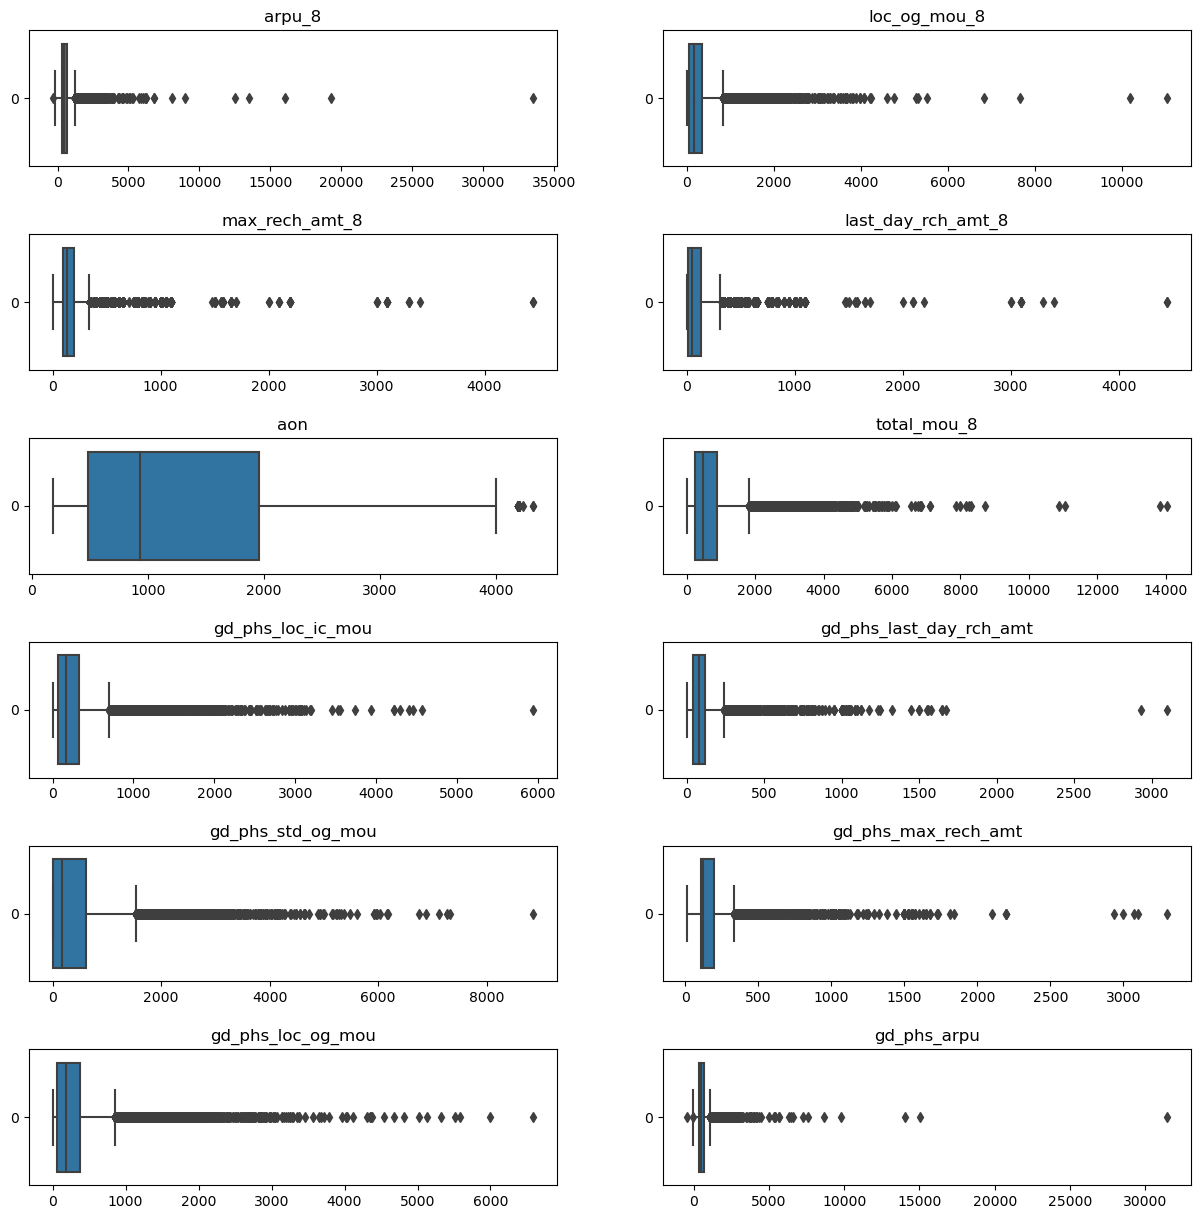

In [63]:
fig, axes = plt.subplots(6,2, figsize=(15, 15))
for index, col in enumerate(col_for_analysis):
    i,j = divmod(index,2)
    sns.boxplot(telecom[col], ax=axes[i,j],orient="h").set_title(col)
    
plt.subplots_adjust(hspace=0.5) 
plt.show()

**As per above analysis there is a outliers observed we need to define upper limit of the variable and make these changes for post expolation of the variable**

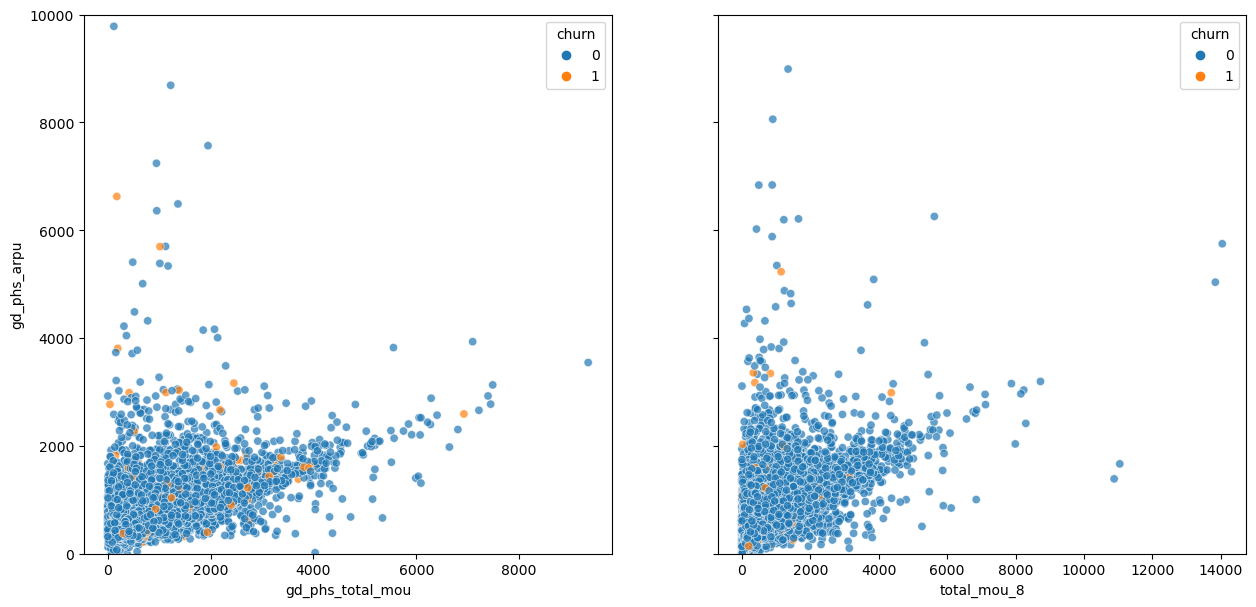

In [64]:
# VBC effects on revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_phs_arpu', x='gd_phs_total_mou', data=telecom, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=telecom, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

**as per the graph we can see that the churn rate of good phase months is more and it is significantly dropped dusring 8th month i.e. action phase**

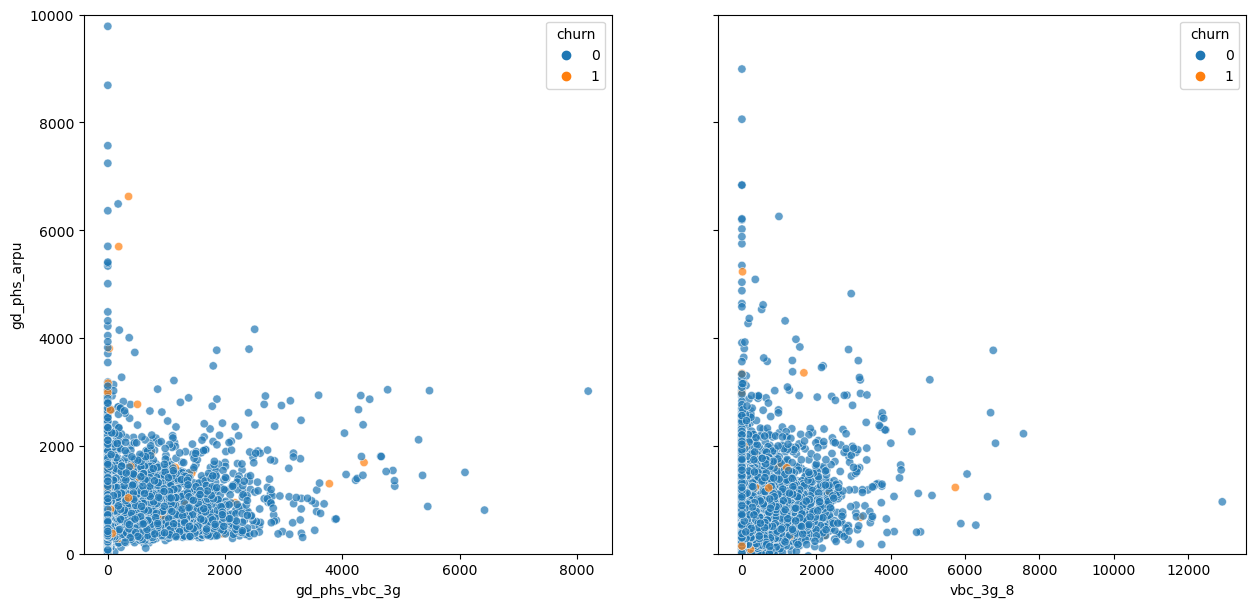

In [65]:
# Lets Check the total month affects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_phs_arpu', x='gd_phs_vbc_3g', data=telecom, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=telecom, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

- We can see that the users who were using very less amount of VBC data and yet were generating high revenue churned

- Yet again we see that the revenue is higher towards the lesser consumption side

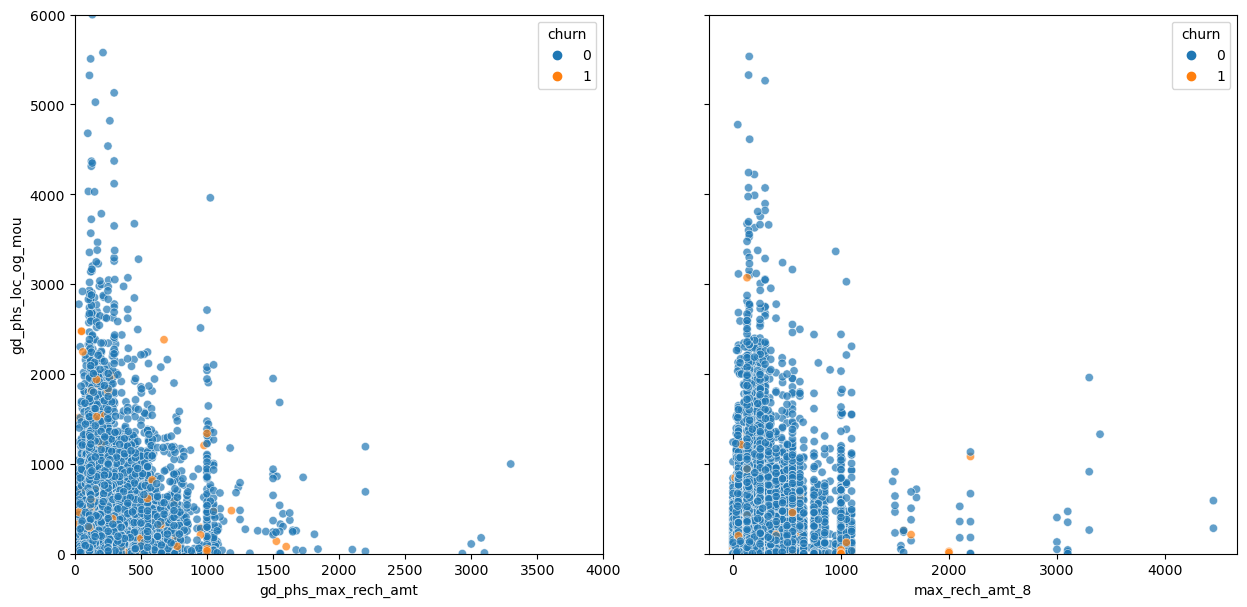

In [66]:
# Lets check the recharge amount and local outgoing calls
fig,axes = plt.subplots(1,2, sharey = True, figsize = (15,7))
sns.scatterplot(x = 'gd_phs_max_rech_amt', y = 'gd_phs_loc_og_mou', data = telecom, ax = axes[0], hue = 'churn', alpha = 0.7)
sns.scatterplot(x = 'max_rech_amt_8', y = 'loc_og_mou_8', data = telecom, ax = axes[1], hue = 'churn', alpha = 0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[0].set_xlim(0,4000)
plt.ylim(0,6000)
plt.show()

- **As per the observations the people who are recharge high amount these peoples using less amount of service than people who are rehgarge less amount** 
- **even the people who are doing max reacharge amount and out going also very less the churn rate is more even in good phase**

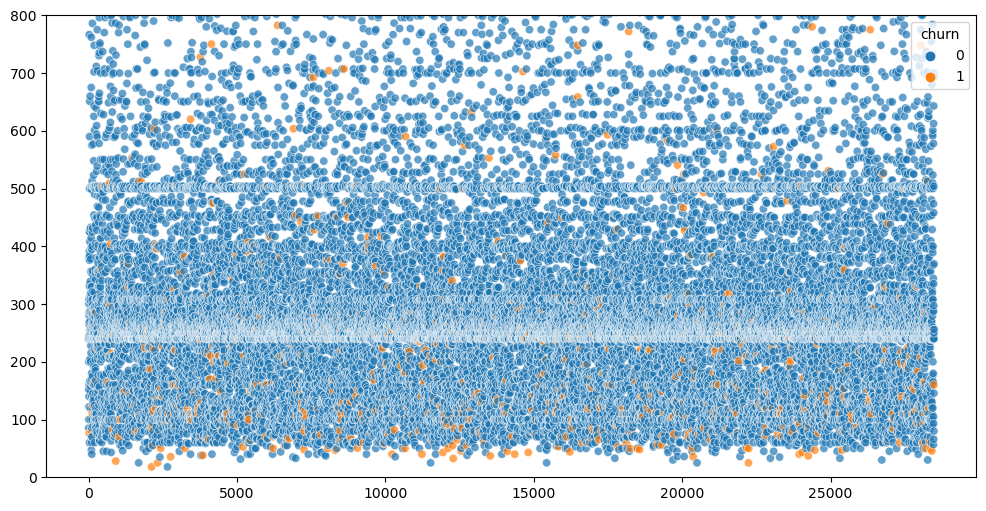

In [67]:
# Now check the effect of maximum recharge amount on churn
plt.figure(figsize = (12,6))
sns.scatterplot(x = telecom.index, y = telecom['gd_phs_max_rech_amt'] + telecom['max_rech_amt_8'], hue = telecom['churn'], alpha = 0.7)
plt.ylim(0,800)
plt.show()

- **As we can see that from above figure the people who are doing recharge amount less than or equal to 200 these peoples are churned more**

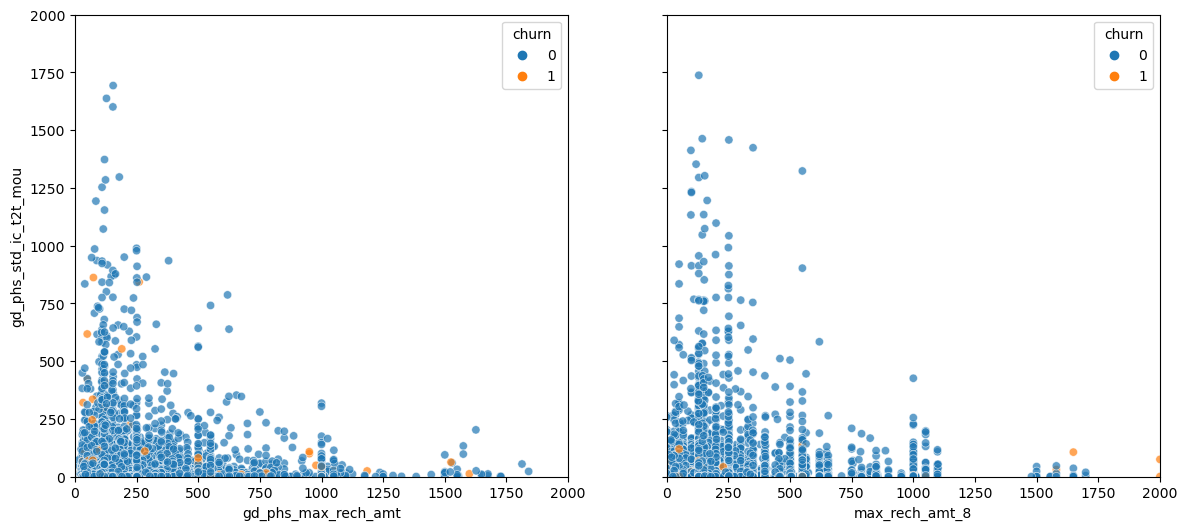

In [68]:
# Incoming Vs Recharge Amount
fig, axes = plt.subplots(1,2,sharey = True, figsize = (14,6))
sns.scatterplot(x = 'gd_phs_max_rech_amt', y = 'gd_phs_std_ic_t2t_mou', data = telecom, ax = axes[0], hue = 'churn', alpha = 0.7)
sns.scatterplot(x = 'max_rech_amt_8', y = 'std_ic_t2t_mou_8', data = telecom, ax = axes[1], hue = 'churn', alpha = 0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)
plt.show()


- **Users having good recharge amount and less incoming calls are churned more in good phase than action phase i.e month 8**

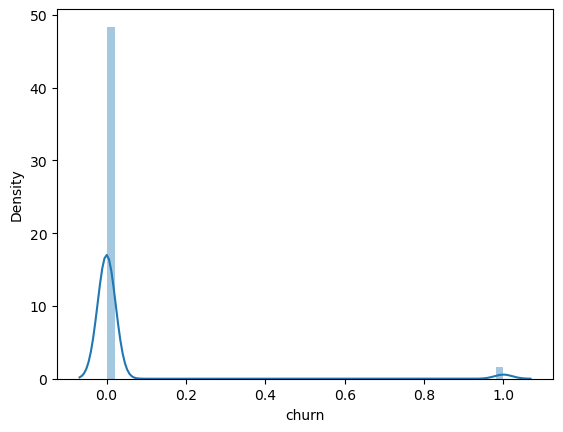

In [69]:
# Check the analysis of target variable
# lets check the distribution of the target variable
sns.distplot(telecom['churn'])
plt.show()

- **As we can see the above distrubution figure the data is highly imbalance, reason is the number on non churners in the dataset is around 94%. we need to handle the imbalance.**

## Step 3. Final Data Preparation

In [70]:
# cap the features that having high outliers

col_upr_lmt = [('arpu_8', 7000),('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_phs_loc_ic_mou', 3000), ('gd_phs_last_day_rch_amt', 1000 ), 
               ('gd_phs_std_og_mou', 4000), ('gd_phs_max_rech_amt', 1500), ('gd_phs_loc_og_mou', 3000), ('gd_phs_arpu', 7000)]
               
for col, value in col_upr_lmt:
               telecom[col] = telecom[col].apply(lambda x : x if x < value else value)
telecom[col_for_analysis].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
0  3171.480        255.79            1000                 779   802   
1   137.362         63.04              30                  10   315   
2   593.260        353.99             130                   0  2607   
3   187.894        205.93             130                 130   511   
4    25.499          0.00              30                   0   667   

   total_mou_8  gd_phs_loc_ic_mou  gd_phs_last_day_rch_amt  gd_phs_std_og_mou  \
0       378.20            391.555                      0.0             68.000   
1       171.56             52.630                     25.0            136.870   
2      1016.70            120.845                     80.0            420.355   
3       233.37            253.345                    100.0             48.990   
4        13.33             42.135                     15.0            574.635   

   gd_phs_max_rech_amt  gd_phs_loc_og_mou  gd_phs_arpu  
0               1185.0            478.035    1209.5150  
1                122.0            333.135     435.4720  
2                110.0            129.395     349.2585  
3                110.0            265.775     365.4220  
4                 55.0             48.770     354.4940

In [71]:
# Define x and y
X = telecom.drop('churn', axis = 1)
y = telecom['churn']

### Scalling of the dataset

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

### handling of Class Imbalance

In [73]:
# check the distribution of churn statistically
telecom.churn.value_counts()

churn
0    27570
1      917
Name: count, dtype: int64

In [74]:
# we can balance the data using SMOTE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X,y)

In [75]:
# Check the Distribution of y_res
y_res.value_counts()

churn
1    27570
0    27570
Name: count, dtype: int64

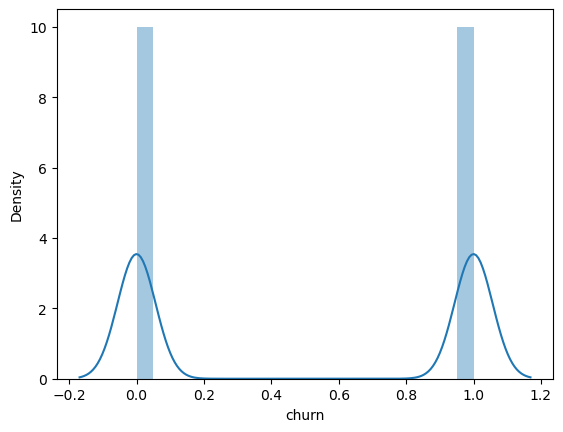

In [76]:
# now plot it for better understanding
sns.distplot(y_res)
plt.show()

- Now it is balanced equally as per the figure and distribution data also shows that

## Step 4. Model Bulding

#### Logistic Regression

#### Splitting of the data in train and test

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.7, random_state = 42)

In [78]:
import statsmodels.api as sm

### Model 1

In [79]:
# initial model
log_ml = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_ml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38598
Model:                            GLM   Df Residuals:                    38542
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17846.
Date:                Mon, 04 Mar 2024   Deviance:                       35692.
Time:                        11:13:50   Pearson chi2:                 3.10e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3697
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4064      0.022    -63.501      0.000      -1.450      -1.363
arpu_8                      0.5178      0.048     10.883      0.000       0.425       0.611
roam_ic_mou_8              -0.3719      0.030    -12.213      0.000      -0.432      -0.312
roam_og_mou_8               0.0150      0.043      0.350      0.726      -0.069       0.099
loc_og_t2c_mou_8            0.1091      0.022      4.922      0.000       0.066       0.153
loc_og_mou_8               -0.4643      0.135     -3.441      0.001      -0.729      -0.200
std_og_t2f_mou_8           -0.1118      0.042     -2.671      0.008      -0.194      -0.030
std_og_mou_8                0.0633      0.211      0.299      0.765      -0.351       0.478
isd_og_mou_8               -0.4091      0.075     -5.421      0.000      -0.557      -0.261
spl_og_mou_8               -0.1350      0.034     -3.913      0.000      -0.203      -0.067
og_others_8                 0.1883      0.029      6.477      0.000       0.131       0.245
loc_ic_mou_8               -1.4914      0.055    -27.260      0.000      -1.599      -1.384
std_ic_t2t_mou_8           -0.5056      0.066     -7.659      0.000      -0.635      -0.376
std_ic_t2f_mou_8            0.0134      0.042      0.319      0.750      -0.069       0.096
std_ic_mou_8               -0.4830      0.053     -9.195      0.000      -0.586      -0.380
spl_ic_mou_8               -0.2477      0.020    -12.221      0.000      -0.287      -0.208
isd_ic_mou_8               -0.1187      0.032     -3.765      0.000      -0.181      -0.057
ic_others_8                 0.2155      0.033      6.499      0.000       0.150       0.280
total_rech_num_8           -0.4602      0.033    -14.100      0.000      -0.524      -0.396
max_rech_amt_8              0.2301      0.024      9.550      0.000       0.183       0.277
last_day_rch_amt_8         -0.6738      0.023    -29.569      0.000      -0.718      -0.629
vol_2g_mb_8                -0.1837      0.031     -5.877      0.000      -0.245      -0.122
monthly_2g_8               -0.5783      0.030    -18.987      0.000      -0.638      -0.519
sachet_2g_8                -0.4358      0.028    -15.397      0.000      -0.491      -0.380
monthly_3g_8               -0.8453      0.040    -21.006      0.000      -0.924      -0.766
sachet_3g_8                -0.4170      0.043     -9.772      0.000      -0.501      -0.333
aon                        -0.4520      0.017    -27.123      0.000      -0.485      -0.419
total_mou_8                -0.9872      0.224     -4.408      0.000      -1.426      -0.548
gd_phs_roam_og_mou          0.4784      0.061      7.846      0.000       0.359       0.598
gd_phs_monthly_3g           0.2136      0.029      7.380      0.000       0.157       0.270
gd_phs_roam_ic_mou         -0.0020      0.022  

- **Here we can see that there are so many variables in the dataset and it is difficult to handle and build the model with this so we can use the automated system of feature sylection that is RFE**

### RFE for Feature Selection

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [81]:
# Create LR Object
logreg = LogisticRegression(solver = 'liblinear')

# Run RFE for 20 features
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'isd_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'aon',
       'total_mou_8', 'gd_phs_roam_og_mou', 'gd_phs_std_og_mou',
       'gd_phs_loc_og_mou', 'gd_phs_total_mou', 'gd_phs_isd_og_mou',
       'gd_phs_total_rech_num', 'gd_phs_loc_ic_mou', 'gd_phs_ic_others'],
      dtype='object')

- **Ok above 20 columns are selected by RFE lets build the model out of them**

### Model 2

In [83]:
X_train_sm = sm.add_constant(X_train[rfe_col])
log_reg_m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_reg_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38598
Model:                            GLM   Df Residuals:                    38577
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18590.
Date:                Mon, 04 Mar 2024   Deviance:                       37181.
Time:                        11:14:43   Pearson chi2:                 1.32e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3449
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2232      0.020    -60.947      0.000      -1.263      -1.184
arpu_8                    0.5895      0.031     19.074      0.000       0.529       0.650
roam_ic_mou_8            -0.2908      0.023    -12.912      0.000      -0.335      -0.247
loc_og_mou_8             -0.4724      0.046    -10.265      0.000      -0.563      -0.382
isd_og_mou_8             -0.3407      0.066     -5.133      0.000      -0.471      -0.211
loc_ic_mou_8             -1.5307      0.053    -28.643      0.000      -1.635      -1.426
std_ic_mou_8             -0.3757      0.029    -12.864      0.000      -0.433      -0.318
total_rech_num_8         -0.7841      0.030    -26.067      0.000      -0.843      -0.725
last_day_rch_amt_8       -0.5615      0.021    -26.157      0.000      -0.604      -0.519
monthly_2g_8             -0.5946      0.024    -24.301      0.000      -0.643      -0.547
monthly_3g_8             -0.5586      0.028    -19.898      0.000      -0.614      -0.504
aon                      -0.4336      0.016    -27.228      0.000      -0.465      -0.402
total_mou_8              -0.8649      0.034    -25.596      0.000      -0.931      -0.799
gd_phs_roam_og_mou        0.4006      0.049      8.214      0.000       0.305       0.496
gd_phs_std_og_mou         1.7798      0.274      6.507      0.000       1.244       2.316
gd_phs_loc_og_mou         1.2453      0.171      7.271      0.000       0.910       1.581
gd_phs_total_mou         -1.5575      0.296     -5.269      0.000      -2.137      -0.978
gd_phs_isd_og_mou         0.4031      0.068      5.949      0.000       0.270       0.536
gd_phs_total_rech_num     0.3524      0.022     16.023      0.000       0.309       0.396
gd_phs_loc_ic_mou         0.8805      0.038     23.283      0.000       0.806       0.955
gd_phs_ic_others         -0.3237      0.057     -5.723      0.000      -0.435      -0.213
=========================================================================================
"""

- **As we can see from the model there is all p values are in the range, lets check the other parameters**

In [84]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'churn': y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

churn  Churn_Prob  predicted
0      0    0.960719          1
1      1    0.820006          1
2      1    0.850703          1
3      0    0.592332          1
4      0    0.693559          1

#### Confusion matrix

In [85]:
from sklearn import metrics

# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
print(confusion)

print()

# The Overall Accuracy
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)}')

[[14822  4490]
 [ 3676 15610]]

Accuracy : 0.7884346339188559


#### VIF

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values,i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features     VIF
13      gd_phs_std_og_mou  103.18
15       gd_phs_total_mou  103.11
14      gd_phs_loc_og_mou   31.30
16      gd_phs_isd_og_mou    4.64
3            isd_og_mou_8    4.61
11            total_mou_8    4.19
12     gd_phs_roam_og_mou    4.19
2            loc_og_mou_8    4.16
0                  arpu_8    4.14
4            loc_ic_mou_8    3.74
18      gd_phs_loc_ic_mou    3.28
6        total_rech_num_8    2.90
17  gd_phs_total_rech_num    2.27
7      last_day_rch_amt_8    1.52
9            monthly_3g_8    1.26
10                    aon    1.24
1           roam_ic_mou_8    1.13
8            monthly_2g_8    1.08
5            std_ic_mou_8    1.08
19       gd_phs_ic_others    1.01

- **from the analysis we found that VIF value of gd_phs_total_mou is having high VIF value so decided to drop it**

In [88]:
# drop the high VIF column
rfe_col = rfe_col.drop('gd_phs_total_mou', 1)

### Model 3

In [89]:
# after dropping the high VIF feature build the new model and check the result
X_train_sm = sm.add_constant(X_train[rfe_col])
log_reg_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_reg_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38598
Model:                            GLM   Df Residuals:                    38578
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18610.
Date:                Mon, 04 Mar 2024   Deviance:                       37220.
Time:                        11:14:45   Pearson chi2:                 1.36e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3443
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2146      0.020    -60.854      0.000      -1.254      -1.175
arpu_8                    0.5727      0.031     18.489      0.000       0.512       0.633
roam_ic_mou_8            -0.2906      0.023    -12.906      0.000      -0.335      -0.246
loc_og_mou_8             -0.4670      0.046    -10.154      0.000      -0.557      -0.377
isd_og_mou_8             -0.3516      0.066     -5.353      0.000      -0.480      -0.223
loc_ic_mou_8             -1.5242      0.053    -28.581      0.000      -1.629      -1.420
std_ic_mou_8             -0.3743      0.029    -12.857      0.000      -0.431      -0.317
total_rech_num_8         -0.7772      0.030    -25.900      0.000      -0.836      -0.718
last_day_rch_amt_8       -0.5594      0.021    -26.092      0.000      -0.601      -0.517
monthly_2g_8             -0.5955      0.024    -24.349      0.000      -0.643      -0.548
monthly_3g_8             -0.5543      0.028    -19.759      0.000      -0.609      -0.499
aon                      -0.4317      0.016    -27.136      0.000      -0.463      -0.401
total_mou_8              -0.8607      0.034    -25.421      0.000      -0.927      -0.794
gd_phs_roam_og_mou        0.1569      0.014     11.009      0.000       0.129       0.185
gd_phs_std_og_mou         0.3420      0.021     16.040      0.000       0.300       0.384
gd_phs_loc_og_mou         0.3573      0.030     11.782      0.000       0.298       0.417
gd_phs_isd_og_mou         0.3078      0.064      4.797      0.000       0.182       0.434
gd_phs_total_rech_num     0.3458      0.022     15.766      0.000       0.303       0.389
gd_phs_loc_ic_mou         0.8732      0.038     23.111      0.000       0.799       0.947
gd_phs_ic_others         -0.3224      0.057     -5.695      0.000      -0.433      -0.211
=========================================================================================
"""

In [90]:
# Predict the train Data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

churn  Churn_Prob  predicted
0      0    0.959549          1
1      1    0.819986          1
2      1    0.851307          1
3      0    0.586345          1
4      0    0.704865          1

In [91]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
print(confusion)

print()

# The overall Accuracy
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)}')


[[14825  4487]
 [ 3677 15609]]

Accuracy : 0.7884864500751334


- *the accuracy is almost same*

In [92]:
# VIF check
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3            isd_og_mou_8  4.58
15      gd_phs_isd_og_mou  4.57
11            total_mou_8  4.18
0                  arpu_8  4.14
2            loc_og_mou_8  4.14
4            loc_ic_mou_8  3.73
17      gd_phs_loc_ic_mou  3.28
14      gd_phs_loc_og_mou  3.09
6        total_rech_num_8  2.90
13      gd_phs_std_og_mou  2.28
16  gd_phs_total_rech_num  2.26
7      last_day_rch_amt_8  1.52
9            monthly_3g_8  1.26
10                    aon  1.24
12     gd_phs_roam_og_mou  1.17
1           roam_ic_mou_8  1.13
8            monthly_2g_8  1.08
5            std_ic_mou_8  1.08
18       gd_phs_ic_others  1.01

- **OK now all the variables p value and VIF are under significant level so now we can proceed further**

## Step 5. Model Evaluation

In [93]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [94]:
# Sensitivity
TP/float(TP+FN)

0.8093435652805143

In [95]:
# Specificity
TN/float(TN + FP)

0.7676574150787076

In [96]:
# False Positive rate
print(FP/float(TN + FP))

0.23234258492129245


In [97]:
# Positive Predicted value
print (TP / float(TP+FP))

0.7767217356687898


In [98]:
# negative Predicted value
print (TN / float(TN+ FN))

0.8012647281374986


### Plotting ROC

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

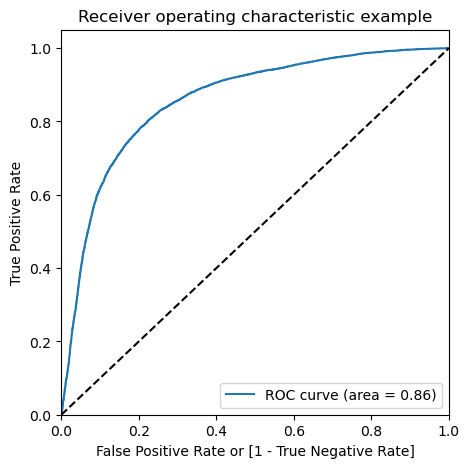

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate=False) 
draw_roc(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

- **Area under ther Curve is 86% which a good for our model**

### Optimal Cut-off Point

In [101]:
# Lets create columnswith different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.959549          1    1    1    1    1    1    1    1    1    1   
1      1    0.819986          1    1    1    1    1    1    1    1    1    1   
2      1    0.851307          1    1    1    1    1    1    1    1    1    1   
3      0    0.586345          1    1    1    1    1    1    1    0    0    0   
4      0    0.704865          1    1    1    1    1    1    1    1    1    0   

   0.9  
0    1  
1    0  
2    0  
3    0  
4    0

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499663  1.000000  0.000000
0.1   0.1  0.616172  0.979778  0.253055
0.2   0.2  0.682367  0.949912  0.415182
0.3   0.3  0.734598  0.920772  0.548674
0.4   0.4  0.772242  0.877165  0.667461
0.5   0.5  0.788486  0.809344  0.767657
0.6   0.6  0.782139  0.716893  0.847297
0.7   0.7  0.751101  0.592450  0.909538
0.8   0.8  0.675372  0.400809  0.949565
0.9   0.9  0.553707  0.123561  0.983275


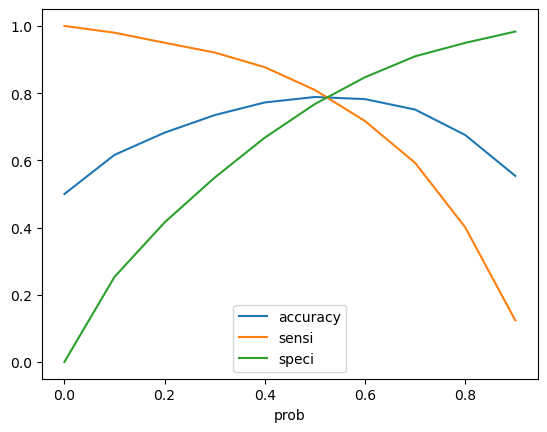

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- **The Optimal Cutoff Point is around 0.52 so we keep that for further process**

In [104]:
# predict on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'churn': y_train.values, 'Churn_Prob': y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

churn  Churn_Prob  predicted
0      0    0.959549          1
1      1    0.819986          1
2      1    0.851307          1
3      0    0.586345          1
4      0    0.704865          1

In [105]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
print(confusion)

print()

# The Overall accuracy
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)}')


[[15186  4126]
 [ 4040 15246]]

Accuracy : 0.7884346339188559


## Step 6. Precision and Recall Tradeoff

In [106]:
from sklearn.metrics import precision_score, recall_score

In [107]:
precision_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.7870121825314887

**Precision Score = 78.70%**

In [108]:
recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.7905216219018978

**Recall Score = 79.90%**

In [109]:
from sklearn.metrics import precision_recall_curve

In [110]:
y_train_pred_final.churn, y_train_pred_final.predicted

(0        0
 1        1
 2        1
 3        0
 4        0
 5        1
 6        0
 7        0
 8        0
 9        1
 10       1
 11       0
 12       0
 13       1
 14       0
 15       1
 16       0
 17       1
 18       0
 19       0
 20       0
 21       1
 22       0
 23       1
 24       1
 25       0
 26       0
 27       1
 28       0
 29       1
 30       1
 31       0
 32       1
 33       0
 34       0
 35       0
 36       1
 37       1
 38       1
 39       1
 40       0
 41       1
 42       0
 43       1
 44       0
 45       0
 46       1
 47       1
 48       0
 49       0
 50       0
 51       0
 52       0
 53       1
 54       0
 55       1
 56       1
 57       1
 58       0
 59       1
 60       0
 61       0
 62       0
 63       0
 64       1
 65       0
 66       1
 67       1
 68       1
 69       1
 70       1
 71       1
 72       0
 73       0
 74       0
 75       0
 76       1
 77       1
 78       0
 79       0
 80       1
 81       0
 82       1
 83 

In [111]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

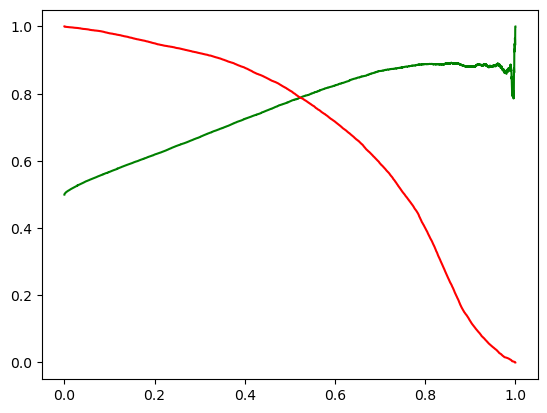

In [112]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 7. Model Performance on Test Set

In [113]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'churn': y_test.values, 'Churn_Prob': y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_test_pred_final.head()

churn  Churn_Prob  predicted
25445      0    0.145454          0
11619      0    0.002677          0
18572      0    0.302123          0
51104      1    0.835919          1
7625       0    0.370635          0

In [114]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.predicted)
print(confusion)

print()

# Overall Accuracy
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted)}')

[[6498 1760]
 [1744 6540]]

Accuracy : 0.7881755531374682


In [115]:
precision_score(y_test_pred_final.churn, y_test_pred_final.predicted)

0.7879518072289157

In [116]:
recall_score(y_test_pred_final.churn, y_test_pred_final.predicted)

0.7894736842105263

**Overall Model is**

**For Train Set**
- Accuracy = 78.84
- Precision score = 78.70
- Recall Score = 79.90

**For Test Set**
- Accuracy = 78.81
- Precision Score = 78.79
- Recall Score = 78.94

***The Overall Model is Performing WELL.***

## Step 8. Top 10 Predictors

In [117]:
abs(res.params).sort_values(ascending = False)[0:11]

loc_ic_mou_8          1.524205
const                 1.214571
gd_phs_loc_ic_mou     0.873158
total_mou_8           0.860684
total_rech_num_8      0.777151
monthly_2g_8          0.595515
arpu_8                0.572732
last_day_rch_amt_8    0.559368
monthly_3g_8          0.554275
loc_og_mou_8          0.466997
aon                   0.431691
dtype: float64

### plot the predictors for churn and non churn customers

In [118]:
# Creating the churn dataframe
data_churn = telecom[telecom['churn'] == 1]

# Creating Non-Churn Dataframe
data_non_churn = telecom[telecom['churn'] == 0]

In [119]:
sns.set_theme()

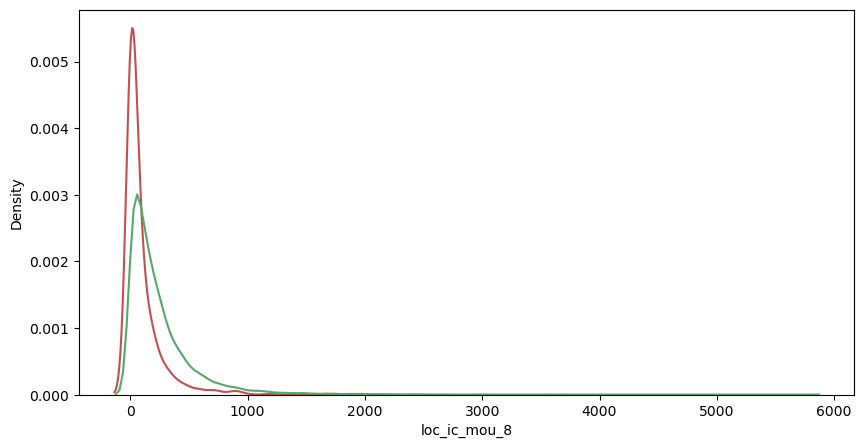

In [120]:
# plotting for local incomming calls for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['loc_ic_mou_8'], color = 'r')
sns.kdeplot(data_non_churn['loc_ic_mou_8'], color = 'g')
plt.show()

**As we can see that the churn customers the usage in month of august is high on the lower side than the non-churn customers**

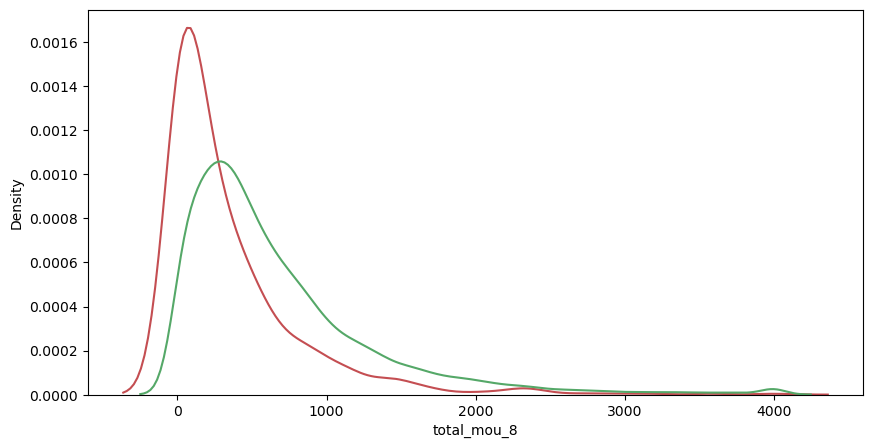

In [121]:
# plotting for month of august for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['total_mou_8'], color = 'r')
sns.kdeplot(data_non_churn['total_mou_8'], color = 'g')
plt.show()

**In Month 8 also we can see that the density of churn customers are high at lower side than non-churn customers**

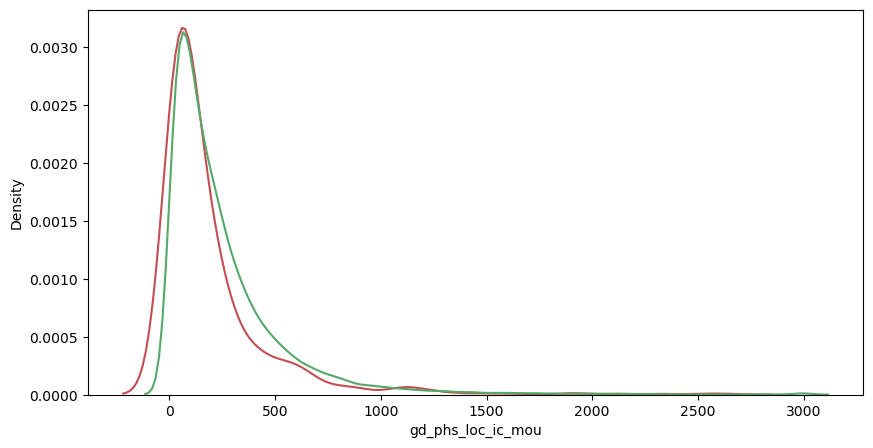

In [122]:
# plotting for incomming calls for good month phase for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['gd_phs_loc_ic_mou'], color = 'r')
sns.kdeplot(data_non_churn['gd_phs_loc_ic_mou'], color = 'g')
plt.show()

**As we can see the churn and non churn is almost same at lower side during good phase of the months**

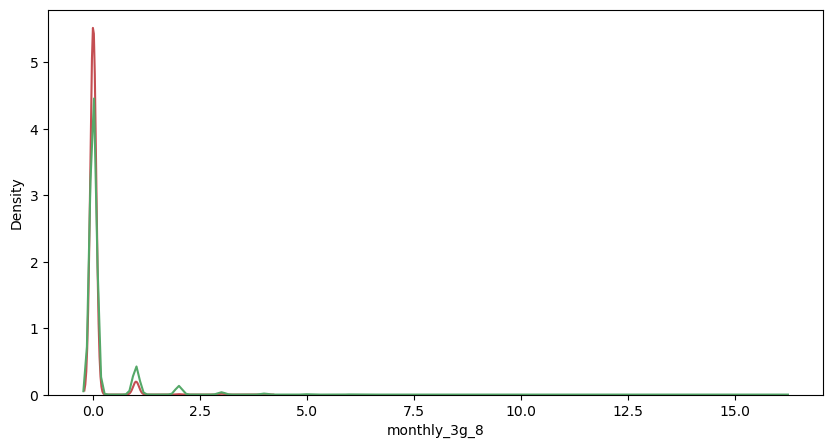

In [123]:
# plotting for 3G network use for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['monthly_3g_8'], color = 'r')
sns.kdeplot(data_non_churn['monthly_3g_8'], color = 'g')
plt.show()

**The number of monthly 3g data for August for the churn customers are very much populated aroud 0, whereas of non churn customers it spreaded accross various numbers.**

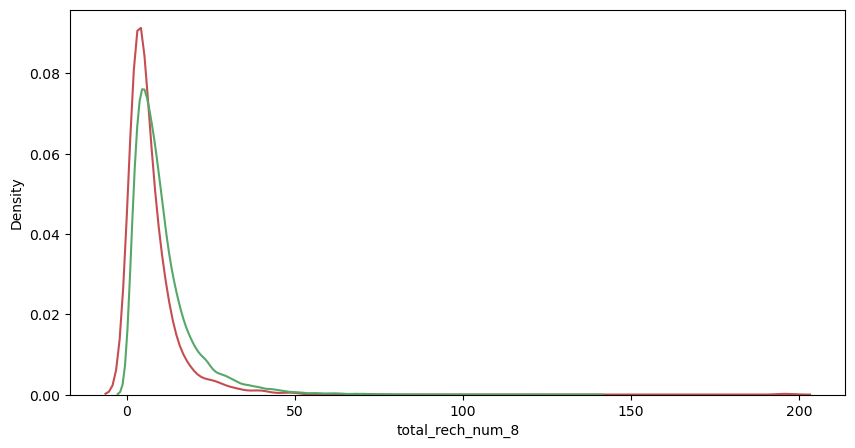

In [124]:
# plotting for total_rech_num_8 for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['total_rech_num_8'], color = 'r')
sns.kdeplot(data_non_churn['total_rech_num_8'], color = 'g')
plt.show()

**As we can see that the lesser the amount of the recharge the churn rate is higher than non churn rate**

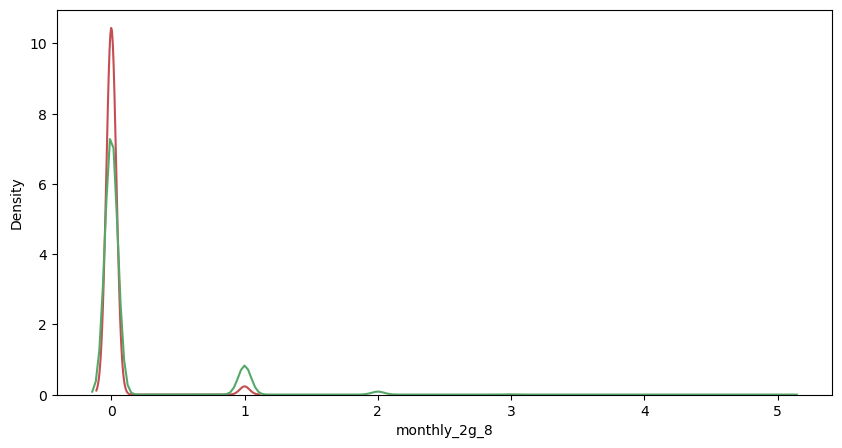

In [125]:
# plotting for 2g Usage for num_8 for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['monthly_2g_8'], color = 'r')
sns.kdeplot(data_non_churn['monthly_2g_8'], color = 'g')
plt.show()

**As per the density of churn rate is accommodate at 0 is very high than non churn. non churn peoples are not prefer to use 2g network.**

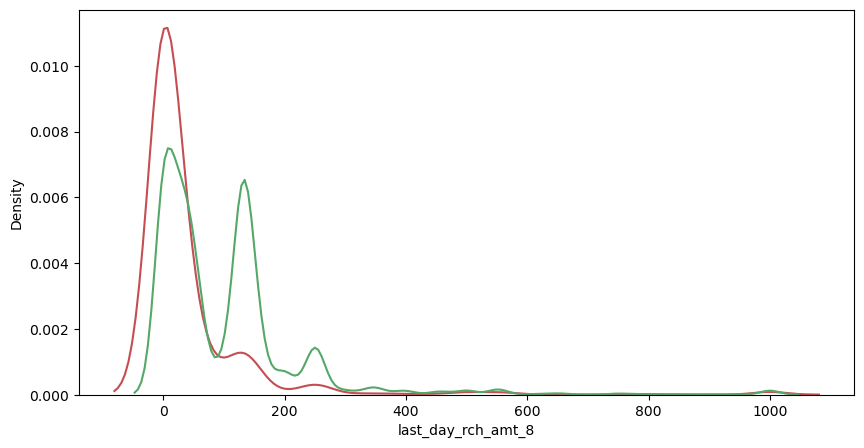

In [126]:
# plotting for last_day_rch_amt_8 for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['last_day_rch_amt_8'], color = 'r')
sns.kdeplot(data_non_churn['last_day_rch_amt_8'], color = 'g')
plt.show()

**As we see the churn rate is increasing below the recharge amount of 200**

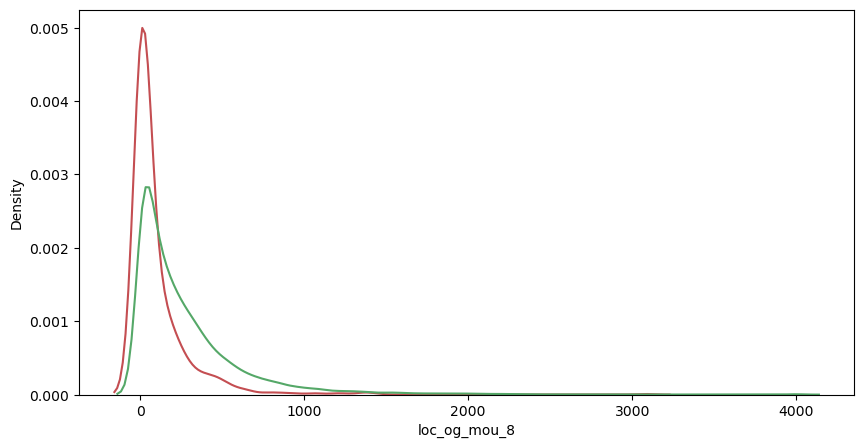

In [127]:
# plotting for loc_og_mou_8 for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['loc_og_mou_8'], color = 'r')
sns.kdeplot(data_non_churn['loc_og_mou_8'], color = 'g')
plt.show()

**outgoing is highly dense at almost 0 in month of august for churned customers but non customers are using the services**

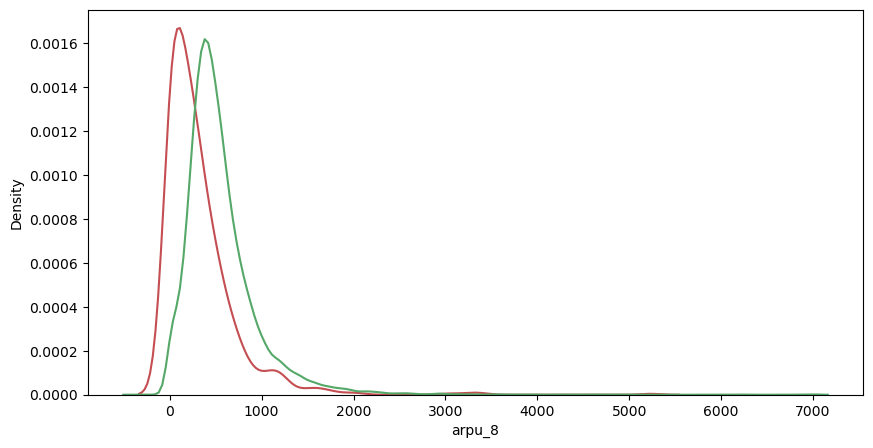

In [128]:
# plotting for arpu_8 for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['arpu_8'], color = 'r')
sns.kdeplot(data_non_churn['arpu_8'], color = 'g')
plt.show()

**Higher the revenue per user lesser is the churn rate and if lesser is the revenue per user higher is the churn rate**

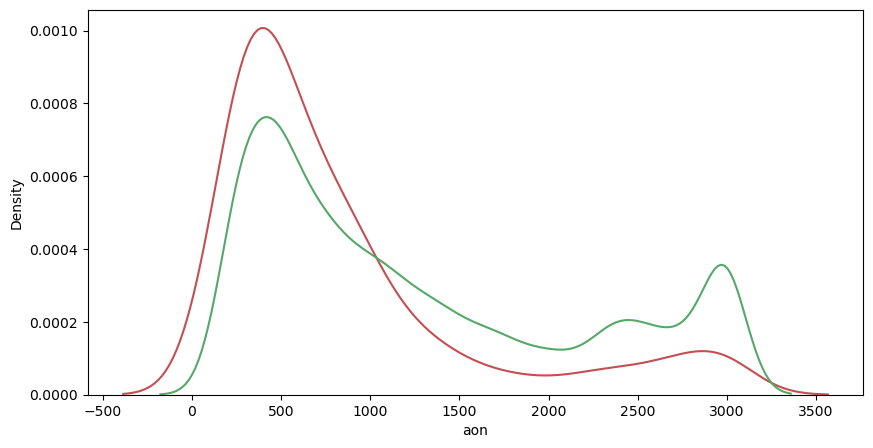

In [129]:
# plotting for Age on network for churn and non-churn customers
plt.style.use('default')
fig = plt.figure(figsize = (10,5))
sns.kdeplot(data_churn['aon'], color = 'r')
sns.kdeplot(data_non_churn['aon'], color = 'g')
plt.show()

**The Age of Network - if more the number of days the user is using the network of same operater the churn rate is lesser as compare the lesser days network usage of same operator. in simple words older the customer there is higher chance of customer will not churn**